In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\demo_data\3.concertriccir2.csv", header=None)
df

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0
...,...,...,...
495,2.177895,2.984489,1.0
496,1.778905,2.869205,1.0
497,0.894180,3.069959,0.0
498,0.849439,3.875435,0.0


In [3]:
df[[0,1]]

,0,1
0,0.700335,-0.247068
1,-3.950019,2.740080
2,0.150222,-2.157638
3,-1.672050,-0.941519
4,2.560483,-1.846577
...,...,...
495,2.177895,2.984489
496,1.778905,2.869205
497,0.894180,3.069959
498,0.849439,3.875435


In [4]:
df.shape[0], df.shape[1]

(500, 3)

<AxesSubplot:xlabel='0', ylabel='1'>

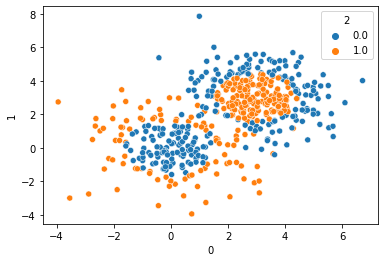

In [5]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2],data=df)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [8]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [9]:
# Implement Neural Networks for classification task and decision boundary
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [20]:
model = Sequential()

model.add(Dense(12,activation='relu', input_dim = 2))
model.add(Dense(10,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [22]:
save = model.fit(x_train, y_train, epochs = 100, validation_split= 0.2)

Epoch 1/100
10/10 [==============================] - 2s 24ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6928 - val_accuracy: 0.4250
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5250 - val_loss: 0.6924 - val_accuracy: 0.4250
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.5250 - val_loss: 0.6920 - val_accuracy: 0.4250
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.5250 - val_loss: 0.6924 - val_accuracy: 0.4250
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6875 - accuracy: 0.5250 - val_loss: 0.6895 - val_accuracy: 0.4250
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6853 - accuracy: 0.5250 - val_loss: 0.6895 - val_accuracy: 0.4250
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.5250 - val_loss: 0.6879 - val_accuracy: 0.4250
Epoch 8/100


In [23]:
save.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

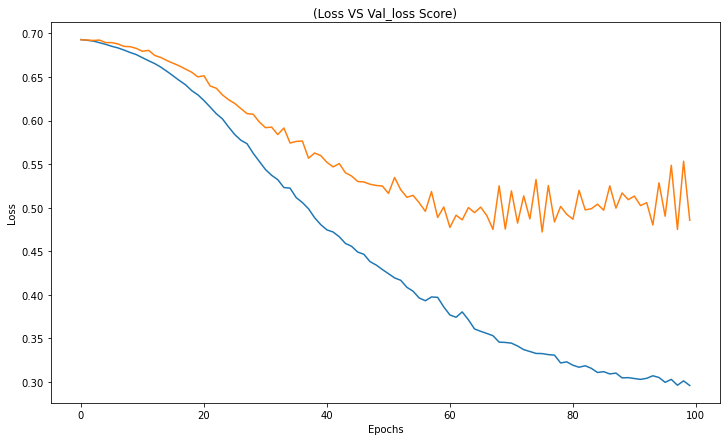

In [24]:
# history.history['loss'], history.history['val_loss'] 
plt.figure(figsize=(12, 7))
plt.plot(save.history['loss'])
plt.plot(save.history['val_loss'])
plt.title("(Loss VS Val_loss Score)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [25]:
y_pred=model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [26]:
y_capf=np.where(y_pred>0.5,1,0)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.82

3888/3888 [==============================] - 5s 1ms/step


<AxesSubplot:>

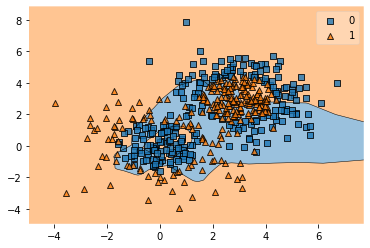

In [28]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

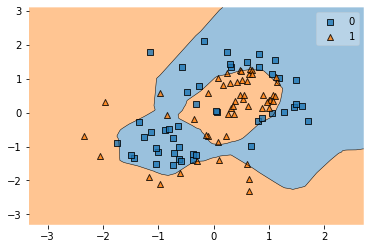

In [29]:
plot_decision_regions(x_test, y_test.values.astype(int), clf=model)